Disease Prediction Using Symptom Data
Overview
This project analyzes a medical dataset where diseases are associated with symptoms represented in binary form (0 for absent, 1 for present). The goal is to:
    -Explore and visualize symptom-disease patterns.
    -Train multiple classification models to predict diseases based on symptoms.
    -Implement a real-time disease prediction function based on user-input symptoms.

Dataset Description
Source: https://data.mendeley.com/datasets/2cxccsxydc/1/files/a16f2141-6e3c-466f-9ce9-28d3d8d91070
Structure:
    -Each row represents a patient record.
    -Each column (except the last) is a symptom (e.g., headache, nausea, fever).
    -The diseases column is the label indicating the diagnosed disease.

Tools & Libraries Used
    -Python
    -pandas, numpy
    -matplotlib, seaborn
    -scikit-learn

Data Preprocessing

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [2]:
df = pd.read_csv("diseaseandsymptoms.csv")
df.head()

,diseases,anxiety and nervousness,depression,shortness of breath,depressive or psychotic symptoms,sharp chest pain,dizziness,insomnia,abnormal involuntary movements,chest tightness,...,stuttering or stammering,problems with orgasm,nose deformity,lump over jaw,sore in nose,hip weakness,back swelling,ankle stiffness or tightness,ankle weakness,neck weakness
0,panic disorder,1,0,1,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,panic disorder,0,0,1,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,panic disorder,1,1,1,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,panic disorder,1,0,0,1,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,panic disorder,1,1,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [3]:
df.shape

(246945, 378)

In [4]:
missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values > 0)

Missing values per column:
 diseases                            False
anxiety and nervousness             False
depression                          False
shortness of breath                 False
depressive or psychotic symptoms    False
                                    ...  
hip weakness                        False
back swelling                       False
ankle stiffness or tightness        False
ankle weakness                      False
neck weakness                       False
Length: 378, dtype: bool


In [5]:
X = df.drop('diseases', axis=1)
y = df['diseases']

In [6]:
value_counts = y.value_counts()
valid_classes = value_counts[value_counts > 1].index
df_filtered = df[df['diseases'].isin(valid_classes)]

In [7]:
X = df_filtered.drop('diseases', axis=1)
X.head()

,anxiety and nervousness,depression,shortness of breath,depressive or psychotic symptoms,sharp chest pain,dizziness,insomnia,abnormal involuntary movements,chest tightness,palpitations,...,stuttering or stammering,problems with orgasm,nose deformity,lump over jaw,sore in nose,hip weakness,back swelling,ankle stiffness or tightness,ankle weakness,neck weakness
0,1,0,1,1,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,1,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,1,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,1,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
y = df_filtered['diseases']
y.head()

0    panic disorder
1    panic disorder
2    panic disorder
3    panic disorder
4    panic disorder
Name: diseases, dtype: object

In [9]:
unique_diseases = df['diseases'].nunique()
print(f"Number of unique diseases: {unique_diseases}")

Number of unique diseases: 773


In [10]:
symptom_columns = list(X.columns)
symptom_columns 

['anxiety and nervousness',
 'depression',
 'shortness of breath',
 'depressive or psychotic symptoms',
 'sharp chest pain',
 'dizziness',
 'insomnia',
 'abnormal involuntary movements',
 'chest tightness',
 'palpitations',
 'irregular heartbeat',
 'breathing fast',
 'hoarse voice',
 'sore throat',
 'difficulty speaking',
 'cough',
 'nasal congestion',
 'throat swelling',
 'diminished hearing',
 'lump in throat',
 'throat feels tight',
 'difficulty in swallowing',
 'skin swelling',
 'retention of urine',
 'groin mass',
 'leg pain',
 'hip pain',
 'suprapubic pain',
 'blood in stool',
 'lack of growth',
 'emotional symptoms',
 'elbow weakness',
 'back weakness',
 'pus in sputum',
 'symptoms of the scrotum and testes',
 'swelling of scrotum',
 'pain in testicles',
 'flatulence',
 'pus draining from ear',
 'jaundice',
 'mass in scrotum',
 'white discharge from eye',
 'irritable infant',
 'abusing alcohol',
 'fainting',
 'hostile behavior',
 'drug abuse',
 'sharp abdominal pain',
 'feeling 

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

Exploratory Data Analysis (EDA)
    1.Distribution of Diseases

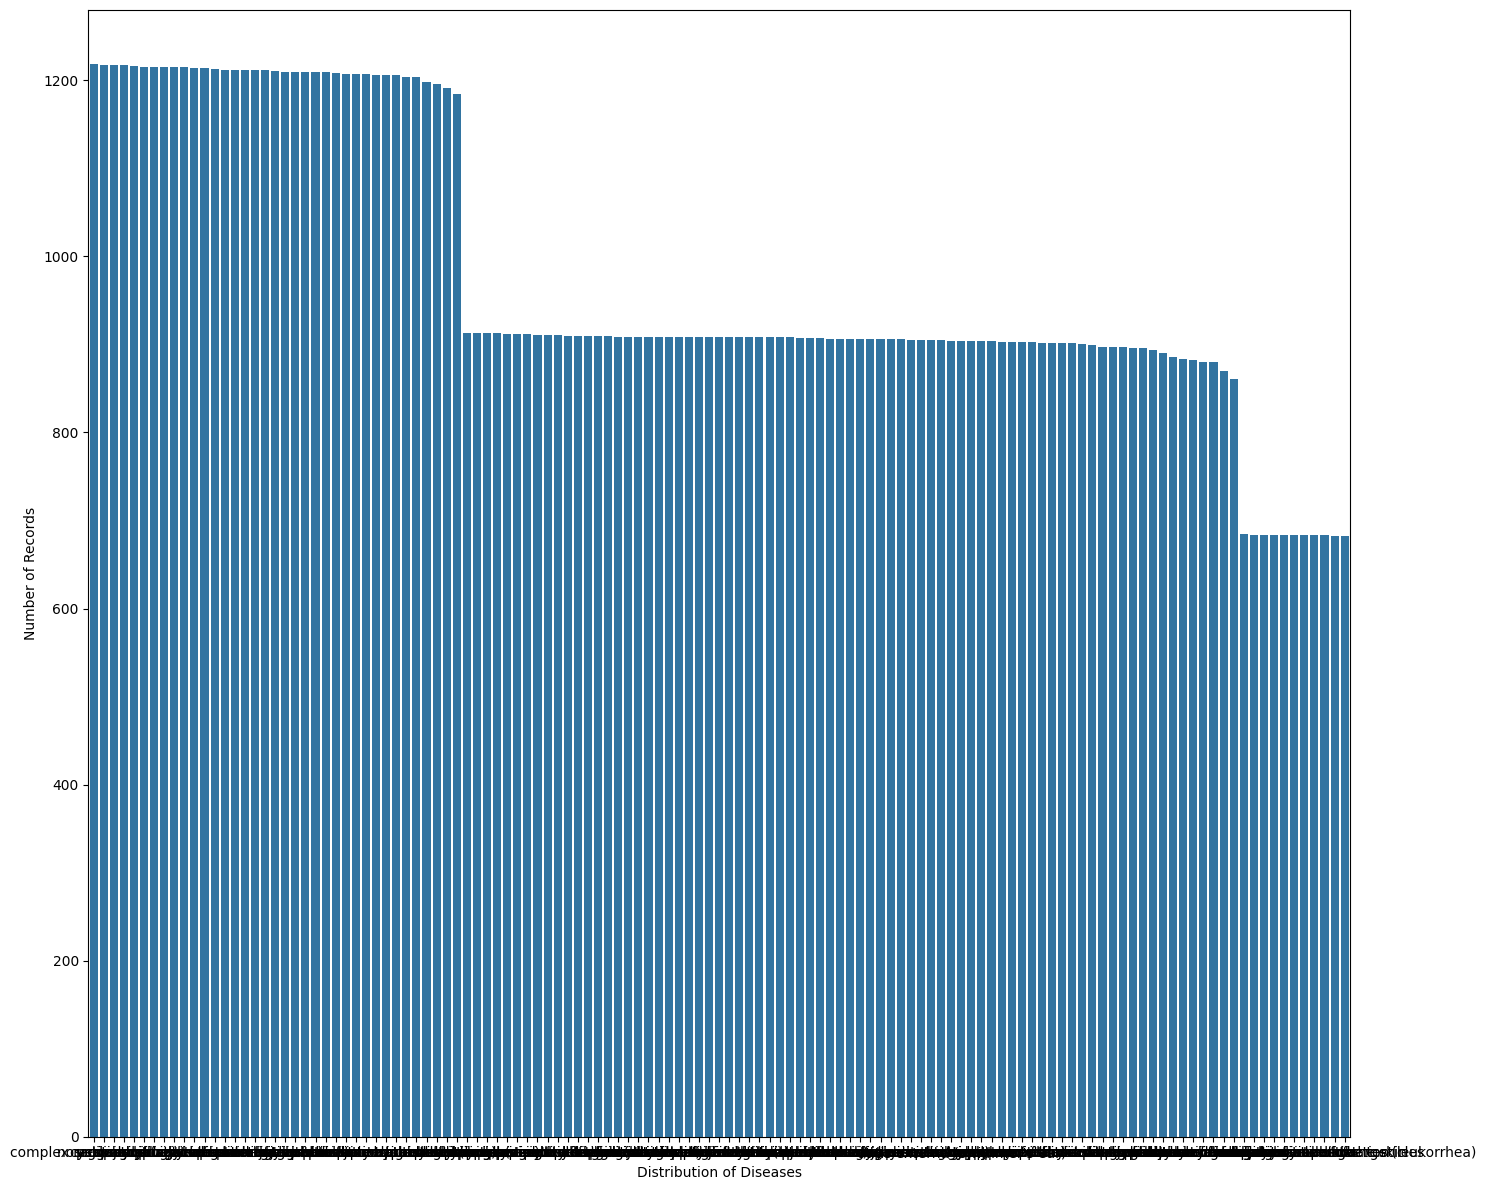

In [12]:
top_diseases = df['diseases'].value_counts().head(125).index
df_top = df[df['diseases'].isin(top_diseases)]
plt.figure(figsize=(15, 12))
sns.countplot(x='diseases', data=df_top, order=top_diseases)
plt.xlabel('Distribution of Diseases')
plt.ylabel('Number of Records')
plt.tight_layout()
plt.show()

    2. Number of Symptom Per Record

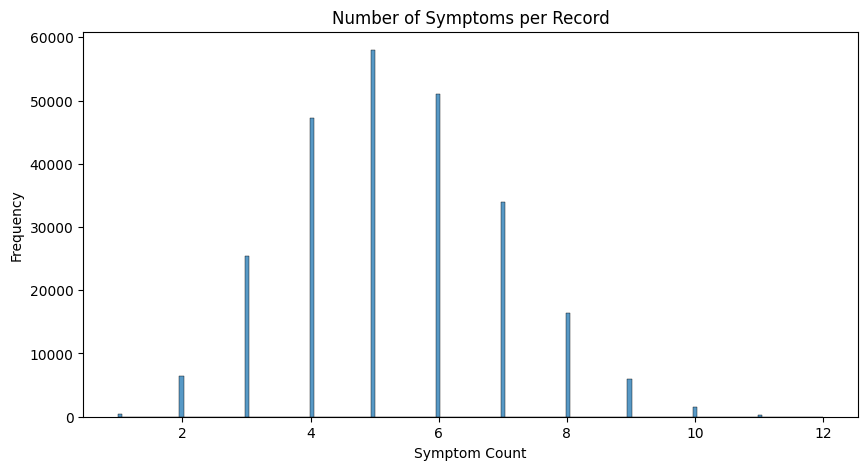

In [13]:
df['Symptom Count'] = df.iloc[:, 1:].sum(axis=1)
plt.figure(figsize=(10,5))
sns.histplot(df['Symptom Count'])
plt.title('Number of Symptoms per Record')
plt.xlabel('Symptom Count')
plt.ylabel('Frequency')
plt.show()

    3. Top 20 Moxt Common Symptoms

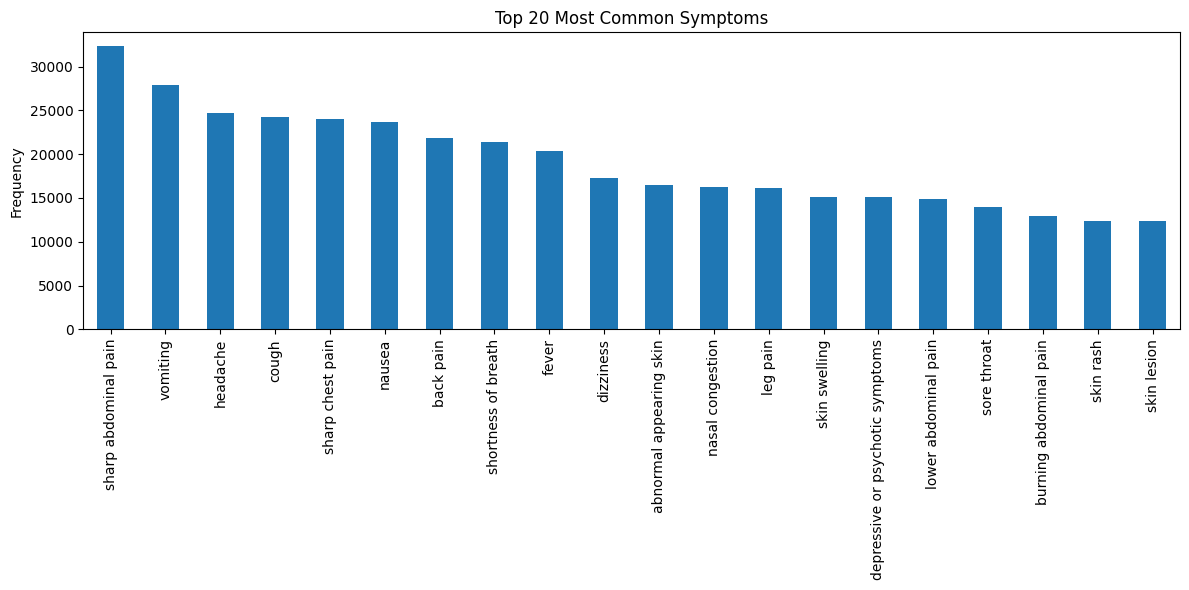

In [14]:
symptom_freq = df.iloc[:, 1:-1].sum().sort_values(ascending=False)[:20]

plt.figure(figsize=(12,6))
symptom_freq.plot(kind='bar')
plt.title('Top 20 Most Common Symptoms')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

    4. 20 Least Common Symptom


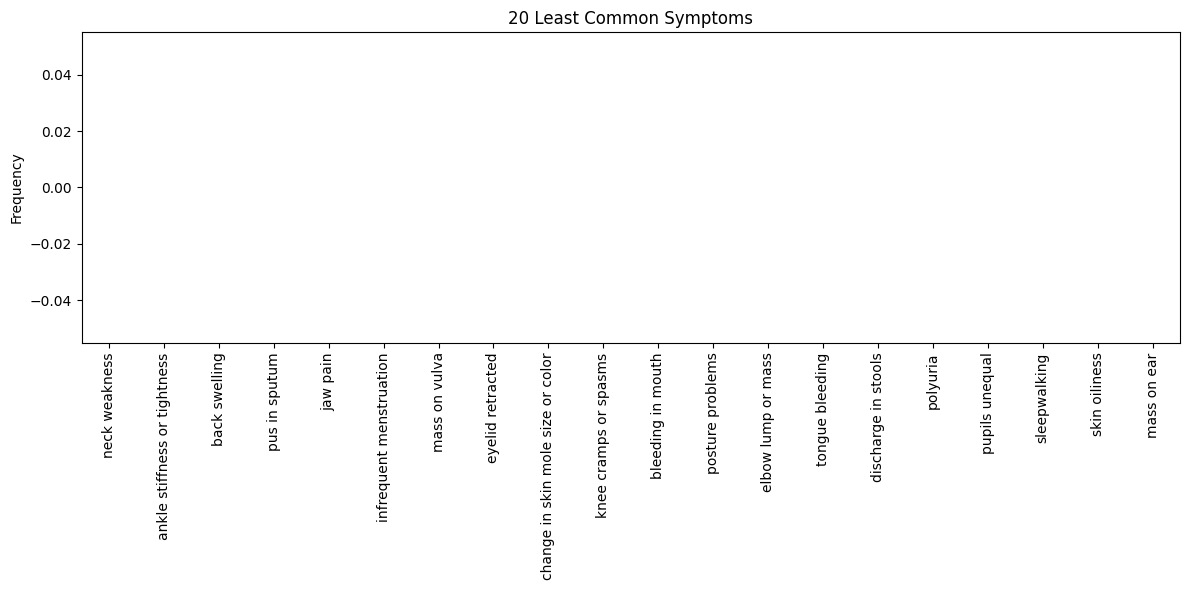

In [15]:
least_common = df.iloc[:, 1:-1].sum().sort_values(ascending=True)[:20]

plt.figure(figsize=(12,6))
least_common.plot(kind='bar', color='red')
plt.title('20 Least Common Symptoms')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

5. HeatMap

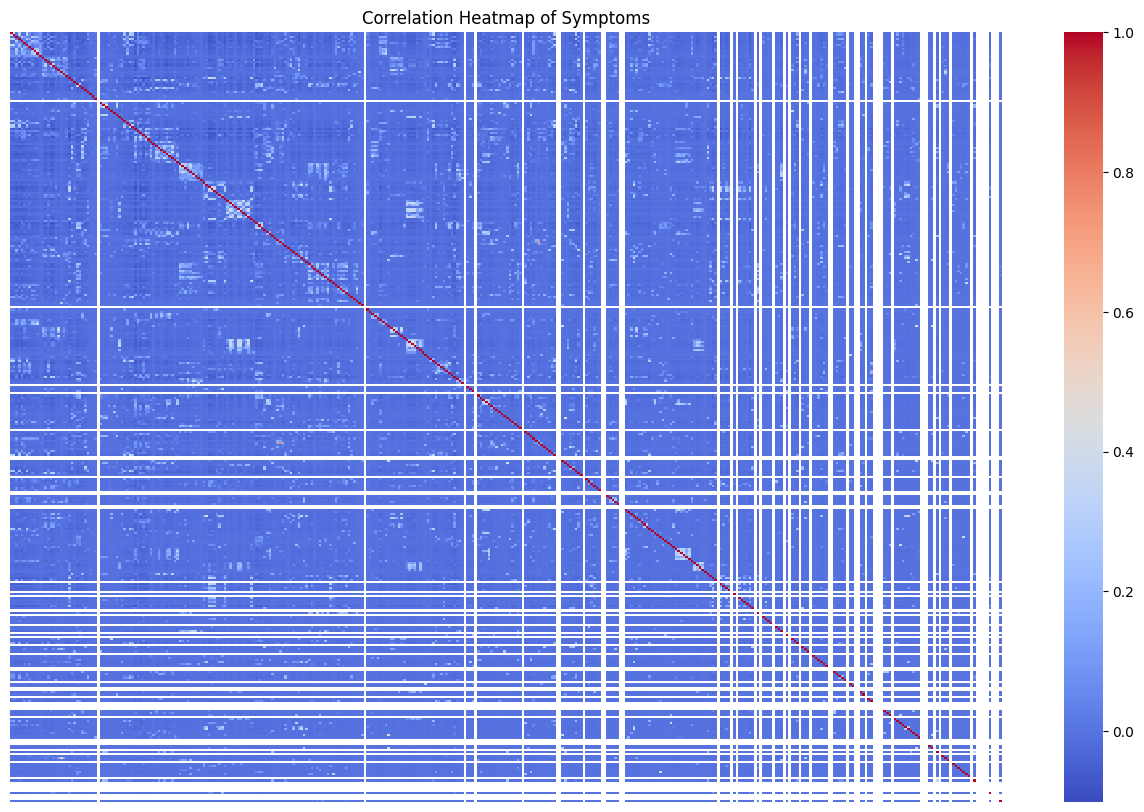

In [16]:
plt.figure(figsize=(16, 10))
corr = df.iloc[:, 1:-2].corr()
sns.heatmap(corr, cmap='coolwarm', xticklabels=False, yticklabels=False)
plt.title('Correlation Heatmap of Symptoms')
plt.show()

6. Top 100 Common Symptom

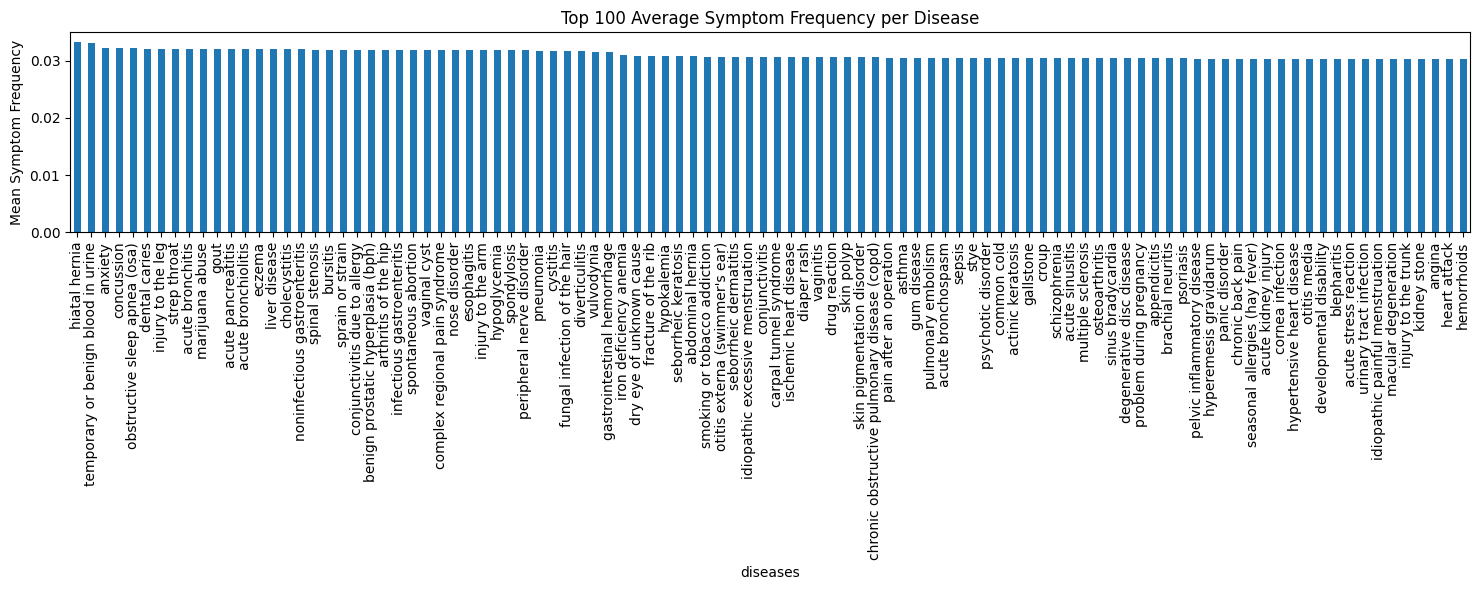

In [17]:
avg_symptoms_per_disease = df.groupby('diseases').mean().mean(axis=1).sort_values(ascending=False)
top_avg = avg_symptoms_per_disease.head(100)
plt.figure(figsize=(15,6))
top_avg.plot(kind='bar')
plt.title('Top 100 Average Symptom Frequency per Disease')
plt.ylabel('Mean Symptom Frequency')
plt.tight_layout()
plt.show()

7. Pie Chart of Disease Proportion

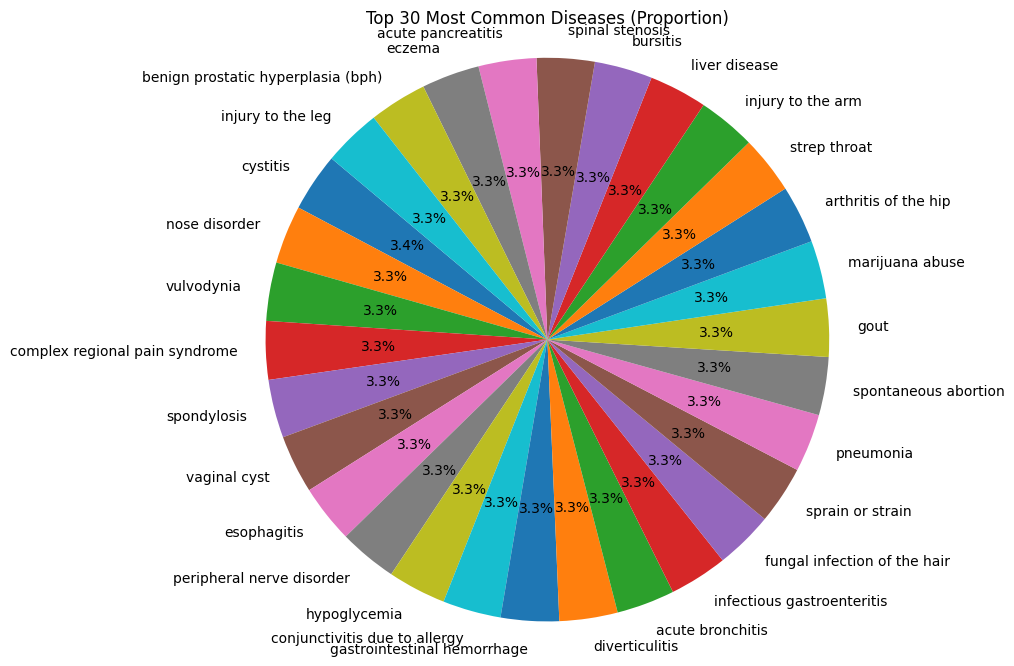

In [18]:
top_30_diseases = df['diseases'].value_counts().head(30)

plt.figure(figsize=(8, 8))
plt.pie(top_30_diseases, labels=top_30_diseases.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 30 Most Common Diseases (Proportion)')
plt.axis('equal')
plt.show()


8.  Top 5 Symptoms for Most Common Diseases

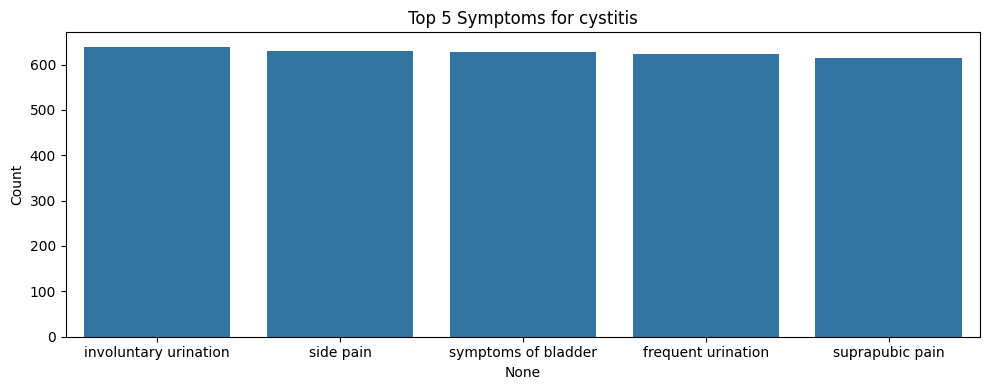

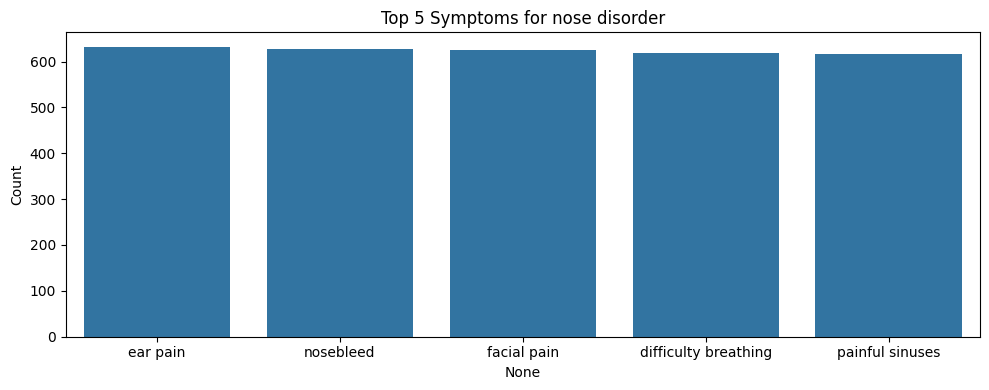

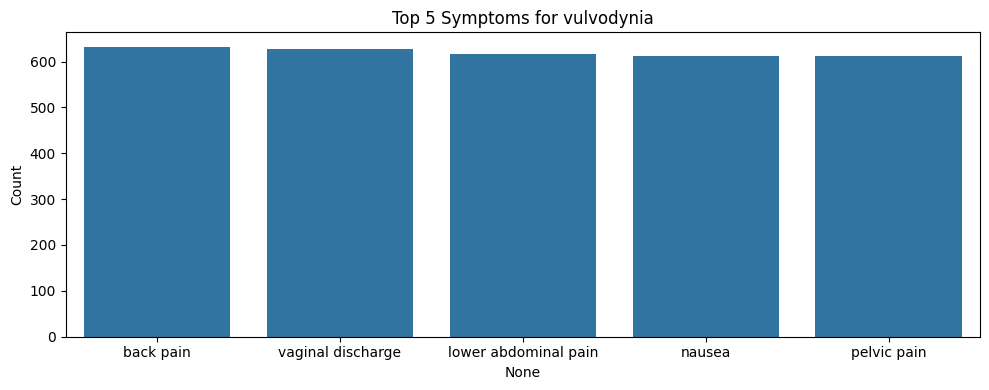

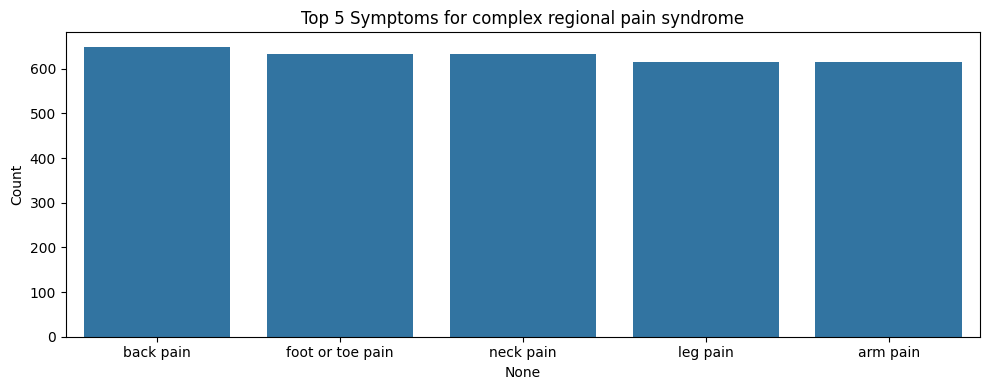

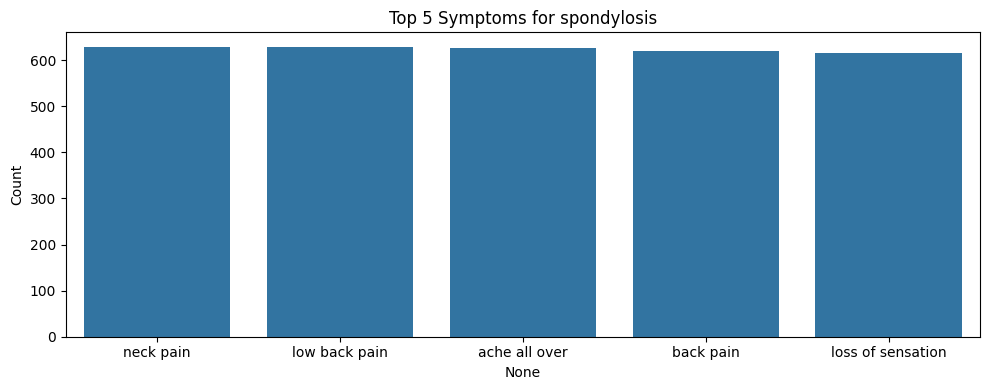

In [19]:
top_diseases = df['diseases'].value_counts().head(5).index

for disease in top_diseases:
    plt.figure(figsize=(10, 4))
    disease_df = df[df['diseases'] == disease].iloc[:, 1:-1]
    symptom_counts = disease_df.sum().sort_values(ascending=False).head(5)
    sns.barplot(x=symptom_counts.index, y=symptom_counts.values)
    plt.title(f'Top 5 Symptoms for {disease}')
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

9. Avg Symptom Count vs Disease Frequency

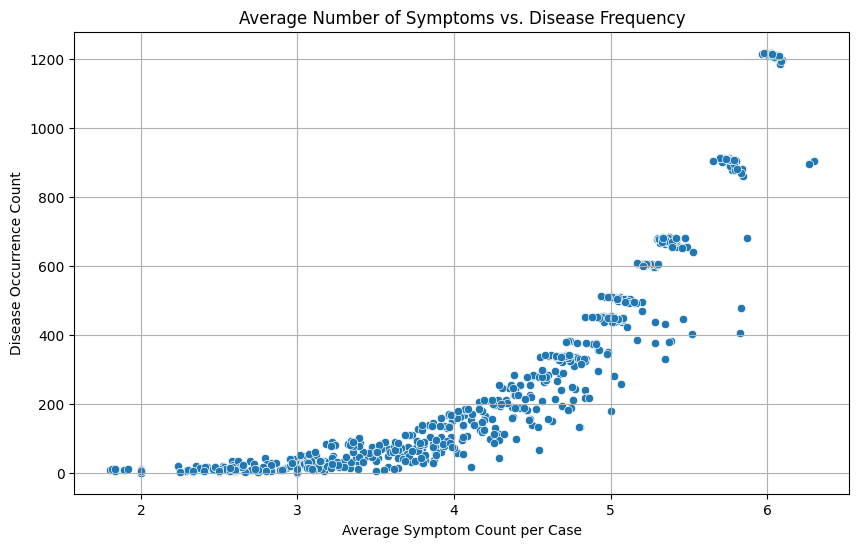

In [20]:
df['Symptom_Count'] = df.iloc[:, 1:-1].sum(axis=1)
disease_symptom_df = df.groupby('diseases')['Symptom_Count'].mean().reset_index()
disease_freq = df['diseases'].value_counts().reset_index()
disease_freq.columns = ['diseases', 'Frequency']
merged = pd.merge(disease_symptom_df, disease_freq, on='diseases')

plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged, x='Symptom_Count', y='Frequency')
plt.title('Average Number of Symptoms vs. Disease Frequency')
plt.xlabel('Average Symptom Count per Case')
plt.ylabel('Disease Occurrence Count')
plt.grid(True)
plt.show()

10. Most Common Symptoms

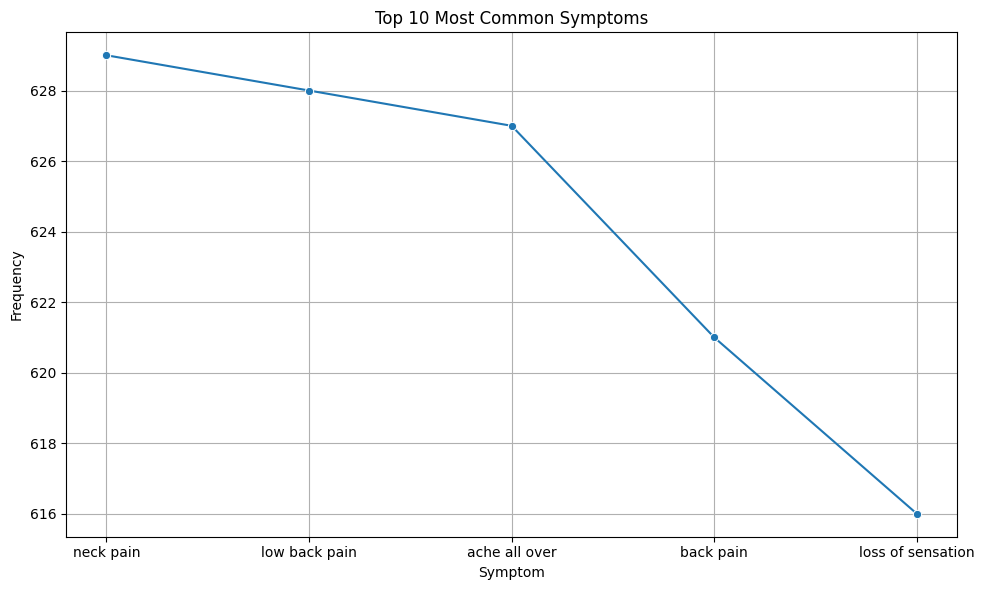

In [21]:

plt.figure(figsize=(10, 6))
sns.lineplot(x=symptom_counts.index, y=symptom_counts.values, marker='o')
plt.title('Top 10 Most Common Symptoms')
plt.xlabel('Symptom')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

Machine Learning: Predicting Diseases

In [22]:
from sklearn.metrics import classification_report, accuracy_score

Train-Test Split

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

ML Models Used
    -Decision Tree Classifier
    -K-Nearest Neighbors (KNN)
    -Logestic Regression
    -Naives Bayes

1. Decision Tree Classifier

In [24]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

all_classes = sorted(set(y_test) | set(y_pred_dt))
report = classification_report(y_test, y_pred_dt, target_names=all_classes)

print("Decision Tree Report:")
print(report)
print("Accuracy:", accuracy_score(y_test, y_pred_dt))


Decision Tree Report:
                                                          precision    recall  f1-score   support

                               abdominal aortic aneurysm       0.97      1.00      0.98        28
                                        abdominal hernia       0.84      0.96      0.90        81
                                         abscess of nose       0.67      0.91      0.77        58
                                     abscess of the lung       0.67      1.00      0.80         4
                                  abscess of the pharynx       0.74      0.84      0.79        68
                                    acanthosis nigricans       0.67      1.00      0.80         6
                                               acariasis       0.86      0.86      0.86         7
                                               achalasia       0.52      0.82      0.64        17
                                                    acne       0.54      0.83      0.65        

2. K-Nearest Neighbors

In [25]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

all_classes = sorted(set(y_test) | set(y_pred_knn))
report = classification_report(y_test, y_pred_knn, target_names=all_classes)

print("KNN Report:")
print(report)
print("Accuracy:", accuracy_score(y_test, y_pred_knn))


KNN Report:
                                                          precision    recall  f1-score   support

                               abdominal aortic aneurysm       0.93      1.00      0.97        28
                                        abdominal hernia       0.92      0.96      0.94        81
                                         abscess of nose       0.52      0.93      0.67        58
                                     abscess of the lung       0.57      1.00      0.73         4
                                  abscess of the pharynx       0.65      0.93      0.76        68
                                    acanthosis nigricans       0.50      1.00      0.67         6
                                               acariasis       0.86      0.86      0.86         7
                                               achalasia       0.48      0.88      0.62        17
                                                    acne       0.51      0.85      0.64        99
       

3. Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

all_classes = sorted(set(y_test) | set(y_pred_lr))
report = classification_report(y_test, y_pred_lr, target_names=all_classes)

print("Logistic Regression Report:")
print(report)
print("Accuracy:", accuracy_score(y_test, y_pred_lr))


Logistic Regression Report:
                                                          precision    recall  f1-score   support

                               abdominal aortic aneurysm       0.93      1.00      0.97        28
                                        abdominal hernia       0.96      1.00      0.98        81
                                         abscess of nose       0.88      0.88      0.88        58
                                     abscess of the lung       1.00      0.75      0.86         4
                                  abscess of the pharynx       0.85      0.94      0.90        68
                                    acanthosis nigricans       0.67      1.00      0.80         6
                                               acariasis       0.86      0.86      0.86         7
                                               achalasia       0.62      0.88      0.73        17
                                                    acne       0.67      0.87      0.76  

4. Naive Bayes

In [27]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

all_classes = sorted(set(y_test) | set(y_pred_nb))
report = classification_report(y_test, y_pred_nb, target_names=all_classes, labels=all_classes, zero_division=0)

print("Naive Bayes Report:")
print(report)
print("Accuracy:", accuracy_score(y_test, y_pred_nb))

Naive Bayes Report:
                                                          precision    recall  f1-score   support

                               abdominal aortic aneurysm       1.00      1.00      1.00        28
                                        abdominal hernia       0.96      0.99      0.98        81
                                         abscess of nose       1.00      0.74      0.85        58
                                     abscess of the lung       0.00      0.00      0.00         4
                                  abscess of the pharynx       0.87      0.79      0.83        68
                                    acanthosis nigricans       1.00      0.17      0.29         6
                                               acariasis       1.00      0.57      0.73         7
                                               achalasia       1.00      0.47      0.64        17
                                                    acne       0.99      0.68      0.80        99

Model Comparison

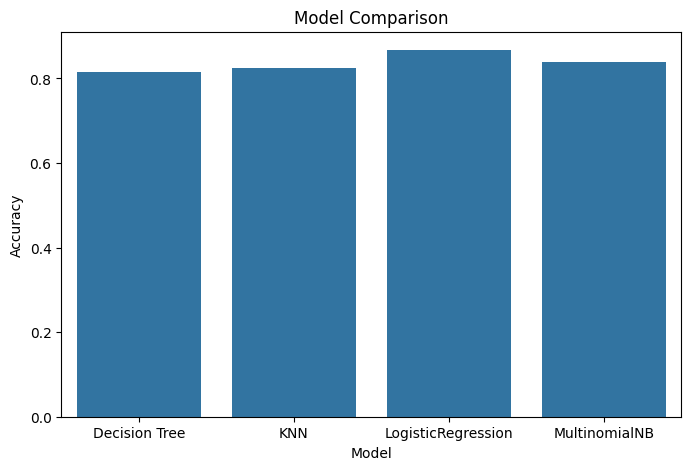

In [28]:
model_scores = {
    "Decision Tree": accuracy_score(y_test, y_pred_dt),
    "KNN": accuracy_score(y_test, y_pred_knn),
    "LogisticRegression": accuracy_score(y_test, y_pred_lr),
    "MultinomialNB": accuracy_score(y_test, y_pred_nb)
}

plt.figure(figsize=(8,5))
sns.barplot(x=list(model_scores.keys()), y=list(model_scores.values()))
plt.ylabel("Accuracy")
plt.xlabel("Model")
plt.title("Model Comparison")
plt.show()


Symptom-Based Prediction Function

In [29]:
def predict_disease(symptom_list):
    input_vector = np.zeros(len(symptom_columns))
    
    for symptom in symptom_list:
        if symptom in symptom_columns:
            index = symptom_columns.index(symptom)
            input_vector[index] = 1
        else:
            print(f"Warning: Symptom '{symptom}' not found in dataset features.")
    
    prediction = nb.predict([input_vector])[0]
    return prediction

In [30]:
input_symptoms = ['headache', 'nausea', 'vomiting', 'fever']
predicted_disease = predict_disease(input_symptoms)

print(f"Predicted Disease: {predicted_disease}")

Predicted Disease: infectious gastroenteritis


In [31]:
input_symptoms = ['shortness of breath', 'chest tightness','sharp chest pain', 'dizziness']
predicted_disease = predict_disease(input_symptoms)

print(f"Predicted Disease: {predicted_disease}")

Predicted Disease: sinus bradycardia
